In [134]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import cv2
import random
import numpy as np
%matplotlib inline

In [135]:
!ls data

ls: cannot access 'data': No such file or directory


In [136]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/sample_submission.csv')

In [137]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [138]:
test_df.head()

,id_code,diagnosis
0,0005cfc8afb6,0
1,003f0afdcd15,0
2,006efc72b638,0
3,00836aaacf06,0
4,009245722fa4,0


In [139]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
id_code      3662 non-null object
diagnosis    3662 non-null int64
dtypes: int64(1), object(1)
memory usage: 57.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 2 columns):
id_code      1928 non-null object
diagnosis    1928 non-null int64
dtypes: int64(1), object(1)
memory usage: 30.2+ KB


(None, None)

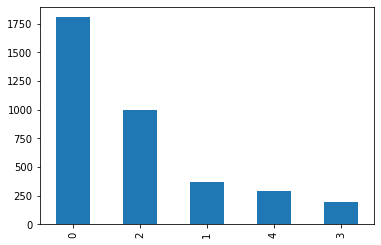

In [140]:
train_df['diagnosis'].value_counts().plot(kind="bar")

In [141]:
counts = np.unique(train_df['diagnosis'].values, return_counts=True)

In [142]:
counts

(array([0, 1, 2, 3, 4]), array([1805,  370,  999,  193,  295]))

In [143]:
i = 0
#img = mpimg.imread('../data/train_images/%s.png' % train_df.iloc[i]["id_code"])

img = cv2.imread('../data/train_images/%s.png' % train_df.iloc[i]["id_code"])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # ****************************

In [144]:
img.shape


(2136, 3216, 3)

In [145]:
np.max(img), np.min(img)

(255, 0)

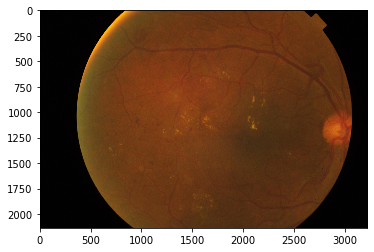

In [146]:
plt.imshow(img)

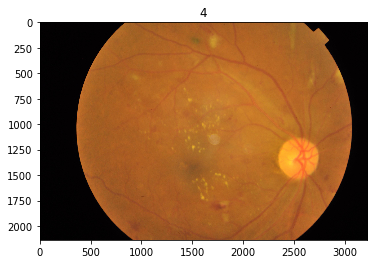

In [147]:
# plot some random training images with their ground truth labels
i = random.choice(range(train_df.shape[0]))
img = mpimg.imread('../data/train_images/' + train_df.iloc[i]['id_code'] + '.png')
plt.imshow(img)
plt.title(train_df.iloc[i]['diagnosis'])
plt.show()

In [148]:
train_df['diagnosis'].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

In [149]:
def display_samples(df, columns=3, rows=3):
    fig=plt.figure(figsize=(5*columns, 4*rows))

    for i in range(columns*rows):
        image_path = df.loc[i,'id_code']
        image_id = df.loc[i,'diagnosis']
        img = cv2.imread(f'../data/train_images/{image_path}.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        fig.add_subplot(rows, columns, i+1)
        plt.title(image_id)
        plt.imshow(img)
    
    plt.tight_layout()

display_samples(train_df)

Error in callback <function flush_figures at 0x7f98be028e18> (for post_execute):


KeyboardInterrupt: 

In [150]:
SEED=0
IMG_SIZE = 512
NUM_CLASSES = 5
SEED = 77
TRAIN_NUM = 1000 # use 1000 when you just want to explore new idea, use -1 for full train



error: OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


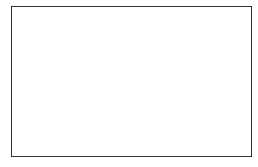

In [151]:

fig = plt.figure(figsize=(25, 16))
# display 10 images from each class
for class_id in sorted(train_df['diagnosis'].unique()):
    for i, (idx, row) in enumerate(train_df.loc[train_df['diagnosis'] == class_id].sample(5, random_state=SEED).iterrows()):
        ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
        path=f"data/train_images/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

        plt.imshow(image)
        ax.set_title('Label: %d-%d-%s' % (class_id, idx, row['id_code']) )
        

In [ ]:
fig = plt.figure(figsize=(25, 16))
for class_id in sorted(train_df['diagnosis'].unique()):
    for i, (idx, row) in enumerate(train_df.loc[train_df['diagnosis'] == class_id].sample(5, random_state=SEED).iterrows()):
        ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
        path=f"data/train_images/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#         image=cv2.addWeighted ( image, 0 , cv2.GaussianBlur( image , (0 ,0 ) , 10) ,-4 ,128)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

        plt.imshow(image, cmap='gray')
        ax.set_title('Label: %d-%d-%s' % (class_id, idx, row['id_code']) )



In [ ]:
fig = plt.figure(figsize=(25, 16))
for class_id in sorted(train_df['diagnosis'].unique()):
    for i, (idx, row) in enumerate(train_df.loc[train_df['diagnosis'] == class_id].sample(5, random_state=SEED).iterrows()):
        ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
        path=f"data/train_images/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , IMG_SIZE/10) ,-4 ,128) # the trick is to add this line

        plt.imshow(image, cmap='gray')
        ax.set_title('Label: %d-%d-%s' % (class_id, idx, row['id_code']) )

### Exploring old data

In [156]:
train_old = pd.read_csv('../data/train_old.csv')
train_old.shape

(35126, 2)

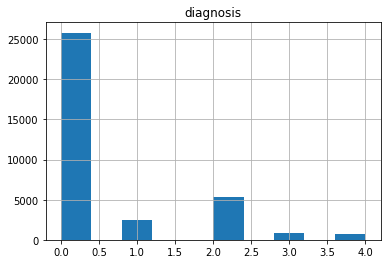

In [157]:
train_old[['diagnosis']].hist();

In [158]:
train_old['diagnosis'].value_counts(normalize=True)

0    0.734783
2    0.150658
1    0.069550
3    0.024853
4    0.020156
Name: diagnosis, dtype: float64

In [164]:
counts = train_df['diagnosis'].value_counts(normalize=True)
counts

0    0.492900
2    0.272802
1    0.101038
4    0.080557
3    0.052703
Name: diagnosis, dtype: float64

In [166]:
counts.loc[1]

0.1010376843255052

In [168]:
count_dict = {}
for i in counts.index:
    count_dict[i] = counts.loc[i]
    print(i, counts.loc[i])
count_dict

0 0.4929000546149645
2 0.272801747678864
1 0.1010376843255052
4 0.08055707263790278
3 0.052703440742763515


{0: 0.4929000546149645,
 2: 0.272801747678864,
 1: 0.1010376843255052,
 4: 0.08055707263790278,
 3: 0.052703440742763515}

In [ ]:
def sample(obj, replace=True, total=20000):
    return obj.sample(n=int(count_dict[obj.name] * total), replace=replace)

In [ ]:
sampled_train = train_old.groupby('diagnosis').apply(sample).reset_index(drop=True)

In [ ]:
sampled_train[['diagnosis']].hist()

In [ ]:
sampled_train['diagnosis'].value_counts(normalize=True)

In [ ]:
np.random.normal(0, 0.1)